# Breast_Cancer_Classification Task

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Data feature check

In [2]:
cancer = load_breast_cancer()

In [3]:
# check what kind of data is in
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# data value check
cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [5]:
# meaning of each data
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Data label balance check

In [6]:
# total label count
len(cancer.target)

569

In [7]:
unique,counts=np.unique(cancer.target,return_counts=True)

In [8]:
# check each label counts
dict(zip(unique,counts))

{0: 212, 1: 357}

In [9]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# Data split

In [11]:
x_train,x_test,y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                 test_size=0.2,random_state=0)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

# Decision Tree

In [13]:
start= time.time()
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train, y_train)
tree_pred = d_tree.predict(x_test)
print(accuracy_score(y_test, tree_pred))
d_report = classification_report(y_test, tree_pred)
d_time = time.time()-start

0.9122807017543859


# Random Forest

In [14]:
start= time.time()
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
r_pred = r_forest.predict(x_test)
print(accuracy_score(y_test, r_pred))
r_report = classification_report(y_test, r_pred)
r_time = time.time()-start

0.956140350877193


# Support Vector Machine

In [15]:
start= time.time()
sv_machine = svm.SVC()
sv_machine.fit(x_train,y_train)
s_pred = sv_machine.predict(x_test)
print(accuracy_score(y_test, s_pred))
s_report = classification_report(y_test, s_pred)
s_time = time.time()-start

0.9298245614035088


# Stochastic Gradient Descent

In [16]:
start= time.time()
sgd_classifier = SGDClassifier()
sgd_classifier.fit(x_train,y_train)
sgd_pred = sgd_classifier.predict(x_test)
print(accuracy_score(y_test, sgd_pred))
sgd_report = classification_report(y_test, sgd_pred)
sgd_time = time.time()-start

0.8421052631578947


# Logistic Regression

In [17]:
start= time.time()
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)
logistic_pred = logistic_regression.predict(x_test)
print(accuracy_score(y_test, logistic_pred))
logistic_report = classification_report(y_test, logistic_pred)
logistic_time = time.time()-start

0.9473684210526315


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


위에 ConvergenceWarning 메세지에 의거해서 시도를 해보고자 구글링을 함
max_iter 입력에도 불구하고 메세지가 달라지지 않아서 StandardScaler를 통해
데이터를 스케일링 시도함

# Scaled Logistic Regression

In [18]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)
start= time.time()
scaled_logistic_regression = LogisticRegression(max_iter=1000)
scaled_logistic_regression.fit(scaled_x_train, y_train)
scaled_logistic_pred = scaled_logistic_regression.predict(scaled_x_test)
scaled_logistic_report = classification_report(y_test, logistic_pred)
scaled_logistic_time = time.time()-start

In [19]:
algorithm_name = ['decision_tree','random_forest','svm','sgd_classifier','logistic_regression','scaled_logistic_regression']
accuracy = [accuracy_score(y_test, tree_pred),accuracy_score(y_test, r_pred),accuracy_score(y_test, s_pred),accuracy_score(y_test, sgd_pred),accuracy_score(y_test, logistic_pred),accuracy_score(y_test,scaled_logistic_pred)]
report = [d_report,r_report,s_report,sgd_report,logistic_report,scaled_logistic_report]
all_time = [d_time,r_time,s_time,sgd_time,logistic_time, scaled_logistic_time]

# Result

In [20]:
import pandas as pd
df = pd.DataFrame(index=algorithm_name)
df['report'] = report
df['accuracy'] = accuracy
df['time'] = all_time
df.sort_values('accuracy',ascending=False, inplace=True)

In [21]:
df

,report,accuracy,time
scaled_logistic_regression,precision recall f1-score ...,0.964912,0.012651
random_forest,precision recall f1-score ...,0.956140,0.180519
logistic_regression,precision recall f1-score ...,0.947368,0.515175
svm,precision recall f1-score ...,0.929825,0.010168
decision_tree,precision recall f1-score ...,0.912281,0.014733
sgd_classifier,precision recall f1-score ...,0.842105,0.007170


In [22]:
print(df.report[0],'\n' ,df.report[1], '\n', df.report[2], df.report[3])

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        47
           1       0.98      0.93      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114
 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.97      0.96      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114
 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        47
           1       0.98      0.93      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114
               p

# 번외
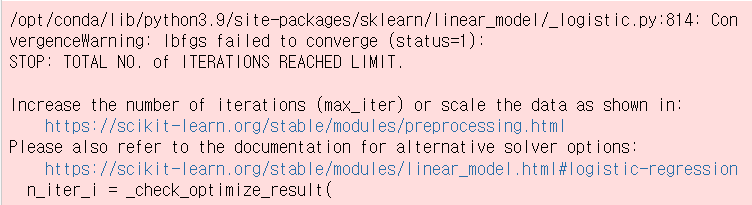

로지스틱회귀에서 위와 같은 메시지가 발생하였음
max_iter를 올려줬지만 그럼에도 불구하고 발생하는걸로 보아
자료의 표준화가 필요해보여서 하는 시도

평가 성능 지표로 Recall을 선택했다 
유방암의 경우 잘못 진단하더라도 양성 여부는 반드시 판단하는 것이 유리하다
따라서 실제 Positive 중에 얼마나 잘 예측했는지의 비율인 Recall이 중점으로 지표가
되어야 한다
Recall 부분에선 로지스틱 회귀가 압도적으로 정확도가 높았으며
데이터 스케일링이후 로지스틱회귀의 단순 정확도마저 높아져서
성능과 속도를 다 잡을 수 있었다